# Kobe Bryant Statistics: INFO 4604 / Applied Machine Learning 
by: Lucas Bouchard, Harold Chang, Steven Rauthus, Justin Klemplar

Summarization: In this notebook, we demonstrate the ability to create a machine learning algorithm that is able to use a dataset containing NBA player Kobe Bryant's career statisics and predict whether a particular action type 

# Notebook Bookmarks:
    
    - Go to Top of Notebook
    - Go to Clean and EDA
    - Go to Feature Selection and Creation
    - Go to Train Models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_csv("data.csv")

# Start of Clean and EDA

In [10]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [13]:
df.action_type.value_counts()

Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot              

# There are too many action types with few occurances. Here we filtered out Kobe Bryant's 20 most common action types and placed the other ones under the category "other."


In [15]:
most_common_action_types = df['action_type'].value_counts()[20:]
common_types = most_common_action_types.index.values

df.loc[df['action_type'].isin(common_types), 'action_type'] = 'Other'
df['action_type'].value_counts()

Jump Shot                     18880
Layup Shot                     2567
Driving Layup Shot             1978
Turnaround Jump Shot           1057
Fadeaway Jump Shot             1048
Running Jump Shot               926
other                           816
Pullup Jump shot                476
Turnaround Fadeaway shot        439
Slam Dunk Shot                  411
Reverse Layup Shot              395
Jump Bank Shot                  333
Driving Dunk Shot               310
Dunk Shot                       262
Tip Shot                        182
Alley Oop Dunk Shot             122
Step Back Jump shot             118
Floating Jump shot              114
Driving Reverse Layup Shot       97
Hook Shot                        84
Other                            82
Name: action_type, dtype: int64

In [18]:
df['period'].value_counts()

3    8296
1    8048
4    7260
2    6718
5     330
6      38
7       7
Name: period, dtype: int64

We then combined periods 5-7 into a single category "overtime"

In [19]:
overtime = np.array([5, 6, 7])
df.loc[df['period'].isin(overtime), 'period'] = 'overtime'
df['period'].value_counts()

3           8296
1           8048
4           7260
2           6718
overtime     375
Name: period, dtype: int64

In [21]:
df.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                 object
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

# Here we set an index and converted some of the data types to "category" for better summmerization purposes

In [22]:
df.set_index('shot_id', inplace=True)
df["action_type"] = df["action_type"].astype('object')
df["combined_shot_type"] = df["combined_shot_type"].astype('category')
df["game_event_id"] = df["game_event_id"].astype('category')
df["game_id"] = df["game_id"].astype('category')
df["period"] = df["period"].astype('object')
df["playoffs"] = df["playoffs"].astype('category')
df["season"] = df["season"].astype('category')
df["shot_made_flag"] = df["shot_made_flag"].astype('category')
df["shot_type"] = df["shot_type"].astype('category')
df["team_id"] = df["team_id"].astype('category')

In [25]:
df.head(1)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


In [26]:
df.dtypes

action_type             object
combined_shot_type    category
game_event_id         category
game_id               category
lat                    float64
loc_x                    int64
loc_y                    int64
lon                    float64
minutes_remaining        int64
period                  object
playoffs              category
season                category
seconds_remaining        int64
shot_distance            int64
shot_made_flag        category
shot_type             category
shot_zone_area          object
shot_zone_basic         object
shot_zone_range         object
team_id               category
team_name               object
game_date               object
matchup                 object
opponent                object
dtype: object

# Here we looked at a few descriptive statisitics

In [28]:
df.shape

(30697, 24)

In [27]:
#Categorical Columns
df.describe(include=['object', 'category'])

,action_type,combined_shot_type,game_event_id,game_id,period,playoffs,season,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,25697.0,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,21,6,620,1559,5,2,20,2.0,2,6,7,5,1,1,1559,74,33
top,Jump Shot,Jump Shot,2,21501228,3,0,2005-06,0.0,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,1610612747,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,132,50,8296,26198,2318,14232.0,24271,13455,12625,9398,30697,30697,50,1020,1978


In [30]:
#Numerical Columns
df.describe(include=['number']).loc[["mean","min","max"]]

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance
mean,33.953192,7.110499,91.107535,-118.26269,4.885624,28.365085,13.437437
min,33.253300,-250.000000,-44.000000,-118.51980,0.000000,0.000000,0.000000
max,34.088300,248.000000,791.000000,-118.02180,11.000000,59.000000,79.000000


# Data Visualization

Here we look at the target class distribution to check for dataset imbalances

C:\Users\Lucas\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


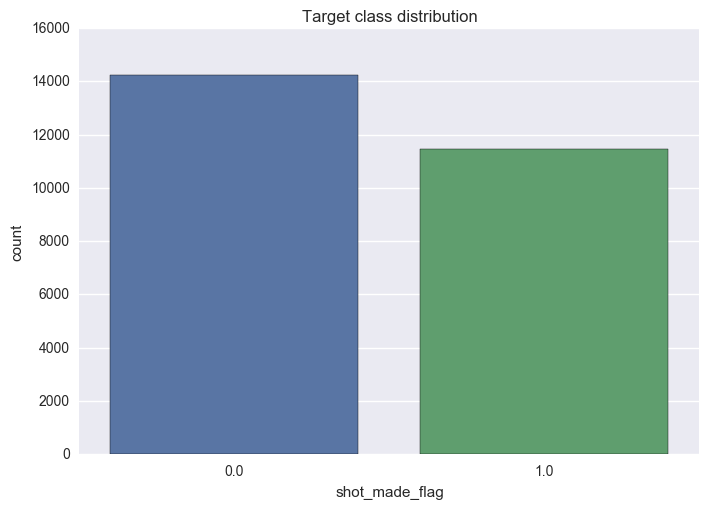

In [32]:

ax = plt.axes()
sns.countplot(x='shot_made_flag', data=df, ax=ax);
ax.set_title('Target class distribution')
plt.show()

Based on this, we can see that ouur target variable is distributed quite equally and will not require any action to deal with imbalance